In [18]:
%cd ..
%pylab inline

/Users/nicolas/Code/ml/Kaggle
Populating the interactive namespace from numpy and matplotlib


In [32]:
import sklearn_evaluation
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [10]:
import credit
from credit import base, features

In [30]:

def plot_confusion_matrix(*, y_test, y_pred):
    # https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    sklearn_evaluation.plot.confusion_matrix(y_test, y_pred)


def plot_roc(*, y_test, y_pred):
    # https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/
    sklearn_evaluation.plot.roc(y_test, y_pred)


def plot_precision_recall(*, y_test, y_pred):
    # https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/
    sklearn_evaluation.plot.precision_recall(y_test, y_pred)


def plot_feature_importances(*, estimator, y_test, y_pred, names):
    sklearn_evaluation.plot.feature_importances(estimator, top_n=5, feature_names=feature_names)


In [26]:
training_df = base.load_training()

# This is the key
preproc_df = features.pre_process(df=training_df)

feature_names = preproc_df.drop('SeriousDlqin2yrs', axis='columns').columns.tolist()
# select, scale & get the np.array we need
X, y = features.scale_features(df=preproc_df, scale=True)

INFO:credit.features:Columns left : SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, 20_30, 30_40, 40_50, 50_60, 60_70, 70_80, 80_90, 90_100, 100_110, retired_2digitage, all_days_late, numbertimenotworse-special90+, -1_0, 0_0.5, 0.5_1, 1_1.2, 1.2_1.5, 1.5_2, 2_5, 5_10, -1_0, 0_0.5, 0.5_0.8, 0.8_1, 1_1.25, 1.25_1.5, 1.5_2, 2_10, 10_100, 100_1000, 1000_10000, 10000_1000000, monthly-expenses, cash-out, -inf_-10000, -10000_-100, -100_0, 0_2500, 2500_5000, 5000_10000, 10000_inf
INFO:credit.features:Scaling following columns : MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, age
INFO:credit.features:(150000, 51)
INFO:credit.features:(150000,)


In [35]:
# estimator = xgb.XGBClassifier(n_estimators= 100, min_weight_fraction_leaf= 0.001)

params = {
                'learning_rate': 0.01,
                'n_estimators': 300,
                'seed': 0,
                'subsample': 0.5,
                'colsample_bytree': 0.5,
                'objective': 'binary:logistic',
                # Control the balance of positive and negative weights, useful for unbalanced classes.
                # A typical value to consider: sum(negative cases) / sum(positive cases)
                'scale_pos_weight': 0.07,
            }
estimator = xgb.XGBClassifier(**params)

In [36]:
estimator.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=0.07, seed=0, silent=True, subsample=0.5)

In [37]:
y_pred = estimator.predict(X)

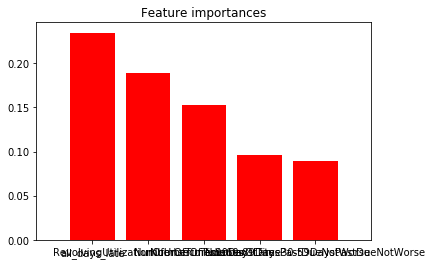

In [38]:
plot_feature_importances(estimator=estimator, y_test=y, y_pred=y_pred, names=feature_names)

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 '20_30',
 '30_40',
 '40_50',
 '50_60',
 '60_70',
 '70_80',
 '80_90',
 '90_100',
 '100_110',
 'retired_2digitage',
 'all_days_late',
 'numbertimenotworse-special90+',
 '-1_0',
 '0_0.5',
 '0.5_1',
 '1_1.2',
 '1.2_1.5',
 '1.5_2',
 '2_5',
 '5_10',
 '-1_0',
 '0_0.5',
 '0.5_0.8',
 '0.8_1',
 '1_1.25',
 '1.25_1.5',
 '1.5_2',
 '2_10',
 '10_100',
 '100_1000',
 '1000_10000',
 '10000_1000000',
 'monthly-expenses',
 'cash-out',
 '-inf_-10000',
 '-10000_-100',
 '-100_0',
 '0_2500',
 '2500_5000',
 '5000_10000',
 '10000_inf']